# KMeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

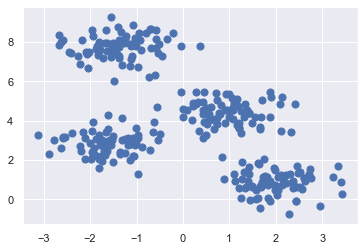

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [4]:
y_kmeans

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3])

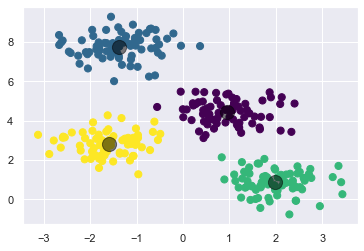

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [25]:
# Initialize yourself

In [24]:
class MyKMeans:
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        pass
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(np.arange(len(X)), self.k, replace = False)] # fix me
        if self.method == 'k-means++':
            # your code here
            pass
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if (new_centroids == self.centroids).all(): # fix me
                break
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        m,n = X.shape
        clusters = np.ones(m)
        for i,x in enumerate(X):
            a = np.linalg.norm(centroids - x, axis = 1)
            clusters[i] = np.argmin(a)
        return clusters

    def maximization(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            new_centroids.append(X[clusters==i].mean(axis = 0))
        return np.array(new_centroids)    
        
    def predict(self, X):
        return self.expectation(X,self.centroids) 
    
    def predict_proba(self, X):
        # ideas ?
        return 

In [25]:
kmeans = MyKMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

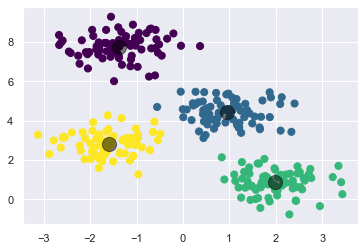

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

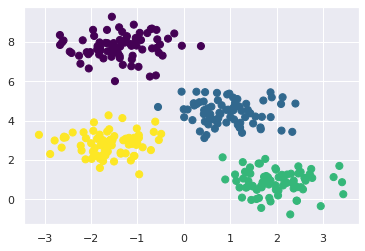

In [44]:
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=10)
y_ac = ac.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_ac, s=50, cmap='viridis')